# Interpolasi (Linear, Bicubic, B-Spline)



Program ini menerapkan tiga metode interpolasi untuk memperbesar citra:

*   Interpolasi Linear: Menggunakan metode bilinear untuk memperkirakan nilai piksel baru.
*   Interpolasi Bicubic: Menggunakan polinomial kubik untuk interpolasi yang lebih halus.
*   Interpolasi B-Spline: Menggunakan fungsi B-Spline dari SciPy untuk interpolasi yang lebih presisi.


In [1]:
# Impor library yang diperlukan
import cv2                               # Library OpenCV untuk pengolahan citra digital
import numpy as np                       # Library NumPy untuk operasi numerik dan manipulasi array
import matplotlib.pyplot as plt          # Library Matplotlib untuk visualisasi gambar
from google.colab import files           # Modul untuk mengunggah file di Google Colab
from scipy import interpolate            # Modul interpolate dari SciPy untuk interpolasi B-Spline

In [2]:
# Mengunggah gambar dari lokal
print("Unggah gambar yang ingin diproses (format .jpg, .png, dll.)")  # Menampilkan pesan untuk meminta pengguna mengunggah gambar
uploaded = files.upload()                # Mengunggah gambar dan menyimpannya dalam variabel uploaded (berupa dictionary)

Unggah gambar yang ingin diproses (format .jpg, .png, dll.)


Saving lena 2.0.jpg to lena 2.0.jpg


In [3]:
# Memuat gambar yang diunggah
filename = next(iter(uploaded))          # Mengambil nama file pertama dari dictionary uploaded
image = cv2.imread(filename)             # Memuat gambar dalam format BGR (default OpenCV)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Mengonversi gambar dari BGR ke RGB untuk tampilan yang benar di Matplotlib

In [4]:
# Mendefinisikan skala pembesaran
scale_factor = 2                         # Faktor pembesaran (misalnya, 2 kali ukuran asli)

In [5]:
# 1. Interpolasi Linear (menggunakan cv2.resize dengan INTER_LINEAR)
linear_resized = cv2.resize(image_rgb, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

In [6]:
# 2. Interpolasi Bicubic (menggunakan cv2.resize dengan INTER_CUBIC)
bicubic_resized = cv2.resize(image_rgb, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)

In [7]:
# 3. Interpolasi B-Spline (menggunakan scipy.interpolate)
# Karena B-Spline memerlukan pendekatan yang berbeda, kita akan menggunakannya untuk setiap kanal warna
def bspline_interpolation(image_channel, scale_factor):
    # Mendapatkan ukuran gambar asli
    h, w = image_channel.shape
    # Membuat grid untuk koordinat asli
    x = np.arange(w)
    y = np.arange(h)
    # Membuat interpolator B-Spline
    interp_func = interpolate.RectBivariateSpline(y, x, image_channel, kx=3, ky=3)
    # Mendefinisikan ukuran baru
    new_h, new_w = int(h * scale_factor), int(w * scale_factor)
    # Membuat grid baru untuk koordinat yang diperbesar
    new_x = np.linspace(0, w-1, new_w)
    new_y = np.linspace(0, h-1, new_h)
    # Melakukan interpolasi
    resized_channel = interp_func(new_y, new_x)
    return resized_channel

In [8]:
# Memisahkan kanal warna untuk interpolasi B-Spline
r_channel = image_rgb[:, :, 0]
g_channel = image_rgb[:, :, 1]
b_channel = image_rgb[:, :, 2]

In [9]:
# Melakukan interpolasi B-Spline pada setiap kanal
r_resized = bspline_interpolation(r_channel, scale_factor)
g_resized = bspline_interpolation(g_channel, scale_factor)
b_resized = bspline_interpolation(b_channel, scale_factor)

In [10]:
# Menggabungkan kembali kanal warna
bspline_resized = np.stack((r_resized, g_resized, b_resized), axis=2).astype(np.uint8)



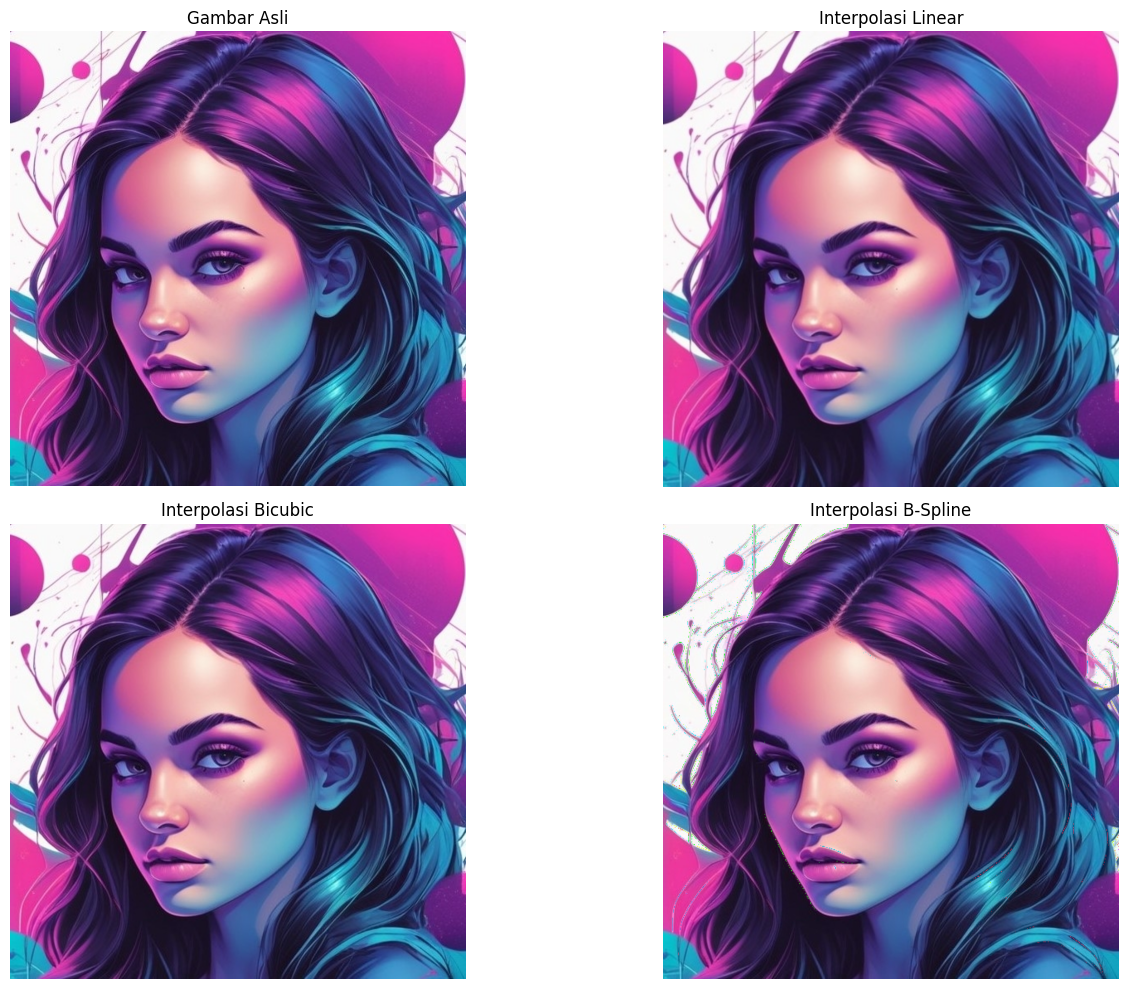

In [11]:
# Menampilkan hasil dalam satu frame
plt.figure(figsize=(15, 10))             # Membuat figure dengan ukuran 15x10 inci untuk menampung empat subplot

# Gambar Asli
plt.subplot(2, 2, 1)                     # Membuat subplot pada posisi 1 (baris 2, kolom 2, indeks 1)
plt.imshow(image_rgb)                    # Menampilkan gambar asli dalam format RGB
plt.title('Gambar Asli')                 # Memberi judul pada subplot
plt.axis('off')                          # Menghilangkan sumbu untuk tampilan yang lebih bersih

# Hasil Interpolasi Linear
plt.subplot(2, 2, 2)                     # Membuat subplot pada posisi 2
plt.imshow(linear_resized)               # Menampilkan gambar yang diinterpolasi dengan metode Linear
plt.title('Interpolasi Linear')          # Memberi judul pada subplot
plt.axis('off')                          # Menghilangkan sumbu

# Hasil Interpolasi Bicubic
plt.subplot(2, 2, 3)                     # Membuat subplot pada posisi 3
plt.imshow(bicubic_resized)              # Menampilkan gambar yang diinterpolasi dengan metode Bicubic
plt.title('Interpolasi Bicubic')         # Memberi judul pada subplot
plt.axis('off')                          # Menghilangkan sumbu

# Hasil Interpolasi B-Spline
plt.subplot(2, 2, 4)                     # Membuat subplot pada posisi 4
plt.imshow(bspline_resized)              # Menampilkan gambar yang diinterpolasi dengan metode B-Spline
plt.title('Interpolasi B-Spline')        # Memberi judul pada subplot
plt.axis('off')                          # Menghilangkan sumbu

plt.tight_layout()                       # Mengatur layout agar subplot tidak saling tumpang tindih
plt.show()                               # Menampilkan semua subplot dalam satu frame